In [1]:
import os
import re
import sys
import glob
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

from invisible_cities.database  import load_db
from invisible_cities.io.dst_io import load_dst
from invisible_cities.io.dst_io import df_writer
%config InlineBackend.figure_format = 'svg'

In [4]:
# Load in the database information
# Configure the detector database
detector_db = "new"
datapmt = load_db.DataPMT(detector_db, 0)
xpmt, ypmt = datapmt["X"].values, datapmt["Y"].values
sensorids  = datapmt["SensorID"].values
pmt = "PmtR11410"

S1 Table validation plots

In [32]:
# Load in the table
lt     = load_dst("../LT/NEW-MC_S1_LT.h5", "LT", "LightTable")
err    = load_dst("../LT/NEW-MC_S1_LT.h5", "LT", "Error")
config = load_dst("../LT/NEW-MC_S1_LT.h5", "LT", "Config")

In [33]:
xmin=-210
xmax=210
xbw=20

zmin=0
zmax=510
zbw=25

xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = xbins
zbins = np.arange(zmin, zmax+zbw, zbw)

xbins_centre = np.arange(xmin+xbw/2, xmax+xbw/2, xbw)
ybins_centre = xbins_centre
zbins_centre = np.arange(zmin+zbw/2, zmax+zbw/2, zbw)

[ 12.5  37.5  62.5  87.5 112.5 137.5 162.5 187.5 212.5 237.5 262.5 287.5
 312.5 337.5 362.5 387.5 412.5 437.5 462.5 487.5 512.5]


/Users/mistryk2/opt/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


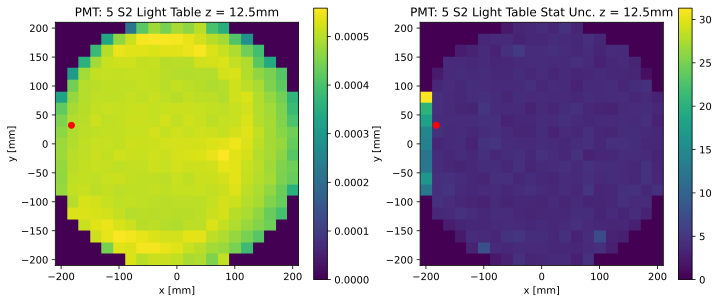

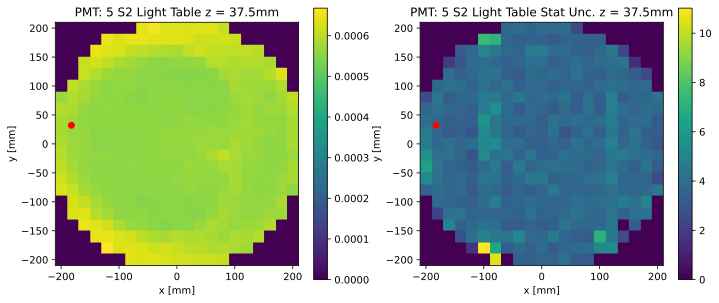

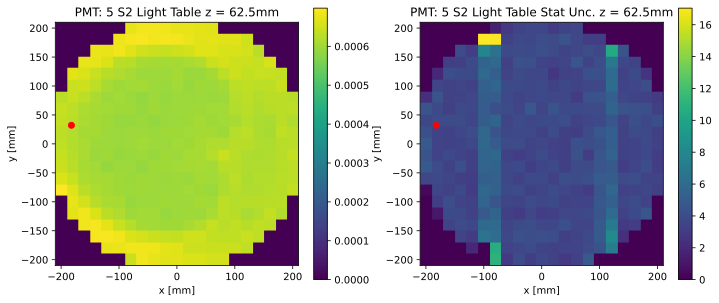

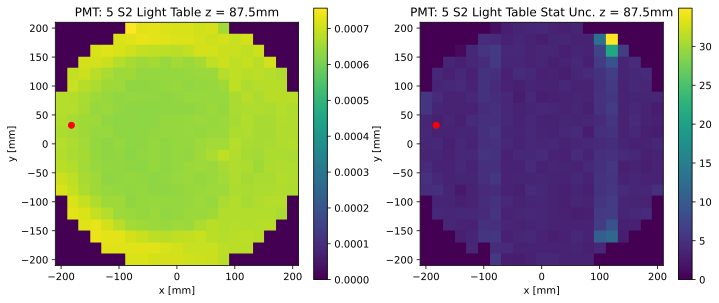

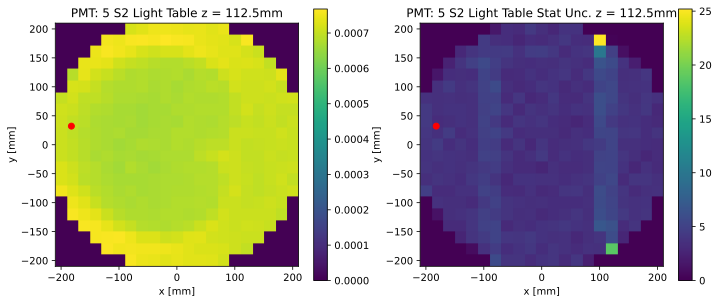

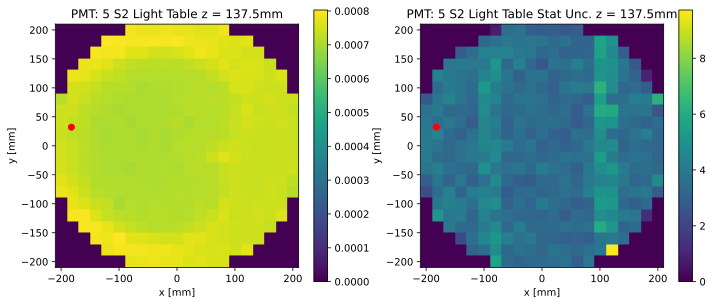

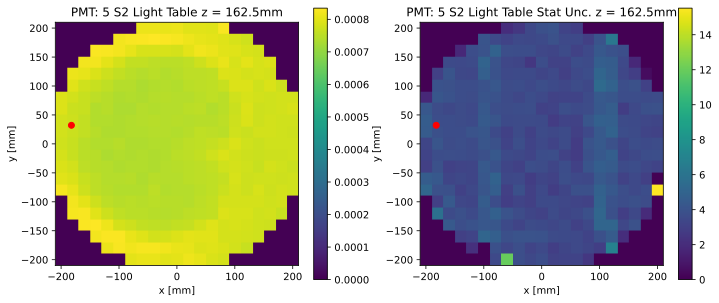

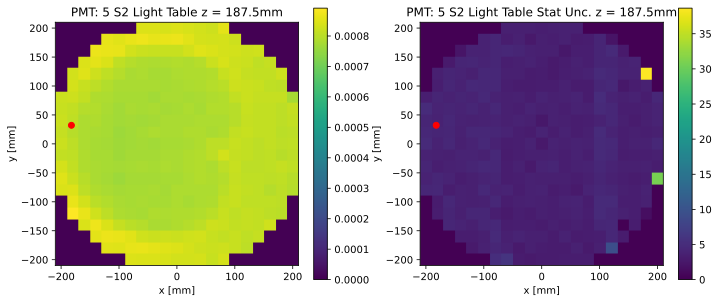

In [42]:
# Plot the slices across all z bins

sensor_id = 5
sid =sensor_id
sensor_name = "PmtR11410_"+str(sensor_id)


n = 8

print(lt.z.unique())

df = lt

for index, z in enumerate(df.z.unique()):
    if (index >= n): break

    sel = df.z == z

    # Make the LT plot and error plot in one
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 5])
    # fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

    # light table
    h, _, _ = np.histogram2d(lt[sel]["x"], lt[sel]["y"], weights=lt[sel][sensor_name], bins=[xbins, ybins])
    im0 = ax0.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
    ax0.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
    ax0.set_title(f"PMT: {sensor_id} S2 Light Table z = {z}mm")
    ax0.set_xlabel("x [mm]")
    ax0.set_ylabel("y [mm]")
    fig.colorbar(im0, ax=ax0)

    # err
    h, _, _ = np.histogram2d(err[sel]["x"], err[sel]["y"], weights=err[sel][sensor_name], bins=[xbins, ybins])
    im1 = ax1.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
    ax1.set_title(f"PMT: {sensor_id} S2 Light Table Stat Unc. z = {z}mm")
    ax1.set_xlabel("x [mm]")
    ax1.set_ylabel("y [mm]")
    ax1.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
    fig.colorbar(im1, ax=ax1)


S2 Table validation plots

In [3]:
# Load in the table
lt     = load_dst("../LT/NEW-MC_S2_LT.h5", "LT", "LightTable")
err    = load_dst("../LT/NEW-MC_S2_LT.h5", "LT", "Error")
config = load_dst("../LT/NEW-MC_S2_LT.h5", "LT", "Config")

In [11]:
# Set the binning
xmin=-210
xmax=210
xbw=5

zmin=-10
zmax=0
zbw=10

xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = xbins
zbins = np.arange(zmin, zmax+zbw, zbw)

xbins_centre = np.arange(xmin+xbw/2, xmax+xbw/2, xbw)
ybins_centre = xbins_centre
zbins_centre = np.arange(zmin+zbw/2, zmax+zbw/2, zbw)

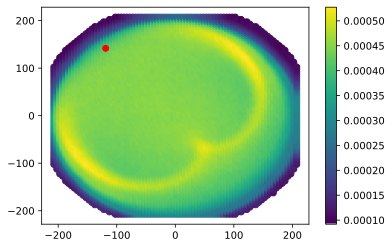

In [10]:
# Plot the slices across all z bins

sensor_id = 4
sid = sensor_id

sensor_name = "PmtR11410_"+str(sensor_id)

df = lt

plt.figure()
sc = plt.scatter(df.x, df.y, c=df[pmt + f"_{sid}"])
plt.scatter(datapmt[datapmt["SensorID"]==sid].X, datapmt[datapmt["SensorID"]==sid].Y, c="r")
plt.colorbar(sc)

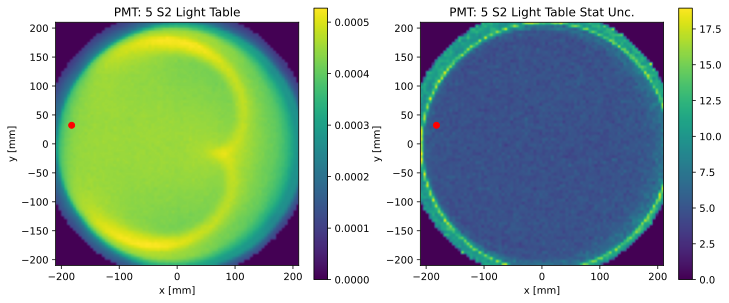

In [30]:
sensor_id = 5
sensor_name = "PmtR11410_"+str(sensor_id)


# Make the LT plot and error plot in one
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 5])
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# light table
h, _, _ = np.histogram2d(lt["x"], lt["y"], weights=lt[sensor_name], bins=[xbins, ybins])
im0 = ax0.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
ax0.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
ax0.set_title(f"PMT: {sensor_id} S2 Light Table")
ax0.set_xlabel("x [mm]")
ax0.set_ylabel("y [mm]")
fig.colorbar(im0, ax=ax0)

# err
h, _, _ = np.histogram2d(err["x"], err["y"], weights=err[sensor_name], bins=[xbins, ybins])
im1 = ax1.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
ax1.set_title(f"PMT: {sensor_id} S2 Light Table Stat Unc.")
ax1.set_xlabel("x [mm]")
ax1.set_ylabel("y [mm]")
ax1.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
fig.colorbar(im1, ax=ax1)